In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
import kagglehub
import os

# Download latest version
dataset_path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

# Find the CSV file within the downloaded directory
csv_file = os.path.join(dataset_path, 'spam.csv')  # Assuming the CSV file is named 'spam.csv'

print("Path to dataset files:", csv_file)

df = pd.read_csv(csv_file, encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1/spam.csv


In [8]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [10]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [11]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [12]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Confusion Matrix:
[[965   0]
 [ 30 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



**Confusion Matrix:** A confusion matrix offers a detailed breakdown of your model's predictions versus actual classifications, highlighting true positives, true negatives, false positives, and false negatives.

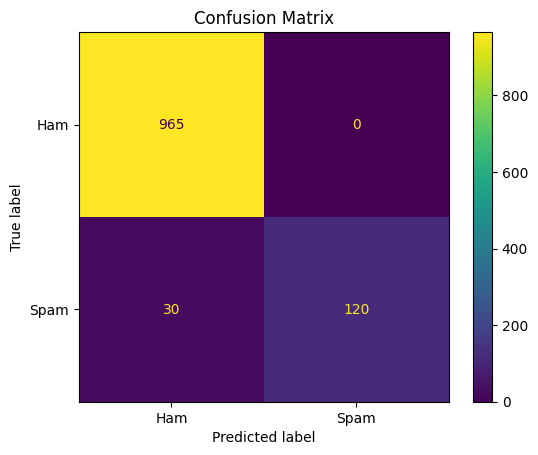

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions on the test set
y_pred = model.predict(X_test_vec)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

**ROC Curve and AUC:** The Receiver Operating Characteristic (ROC) curve illustrates the trade-off between true positive and false positive rates across different thresholds, while the Area Under the Curve (AUC) quantifies overall model performance.

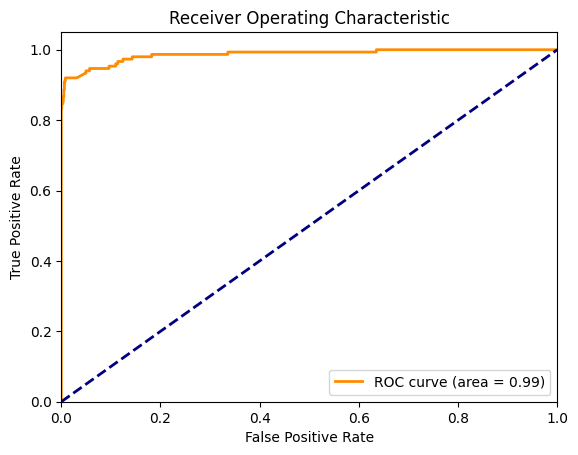

In [15]:
from sklearn.metrics import roc_curve, auc

# Obtain prediction probabilities
y_prob = model.predict_proba(X_test_vec)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**Precision-Recall Curve:** This curve plots precision against recall, offering insights into the balance between these metrics, especially useful in imbalanced datasets.

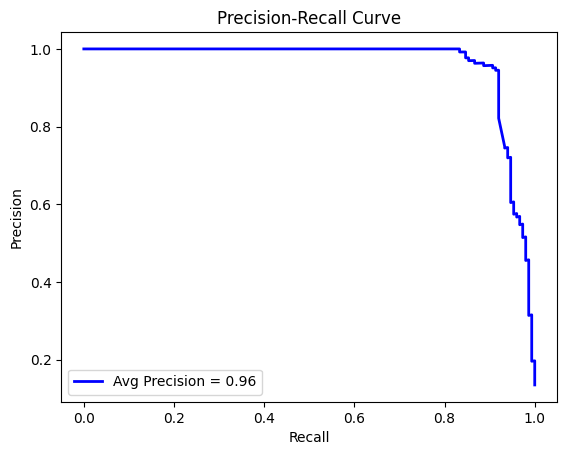

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [24]:
sample_message = ["From you account 37 rupee debited"]
sample_message_vec = vectorizer.transform(sample_message)
prediction = model.predict(sample_message_vec)
print('Spam' if prediction[0] else 'Not Spam')

Not Spam
